<a href="https://colab.research.google.com/github/jshivamds272/Data-science-projects/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (2).csv


In [ ]:
#import training and test dataset
import io
train_data=pd.read_csv(io.BytesIO(uploaded["train.csv"]),na_values=['-'])
#test_data=pd.read_csv("/content/test.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
train_data.shape


(19237, 18)

In [ ]:
train_data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
train_data.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [ ]:
train_data.ID.unique().shape

(18924,)

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Levy,13418.0,9.068381e+02,461.867051,87.0,640.0,781.0,1058.0,11714.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [ ]:
train_data.describe(include='object')

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,65,1590,11,2,7,107,7687,4,3,3,2,16
top,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


Data Cleaning and Filter

In [ ]:
train_data['Levy'].fillna(train_data['Levy'].median(),inplace=True)

In [ ]:
train_data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

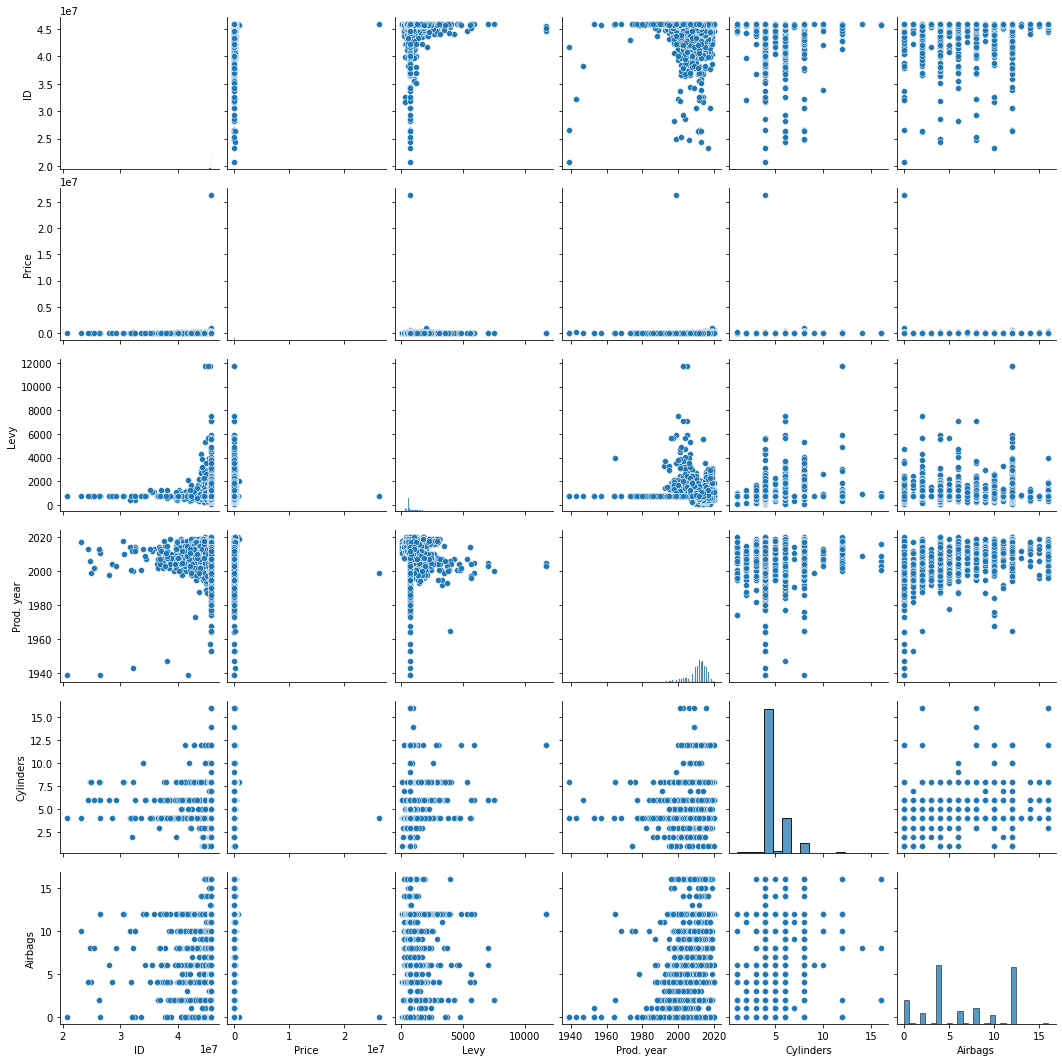

In [ ]:


sns.pairplot(train_data)


In [ ]:
train_data.corr()

,ID,Price,Levy,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000844,0.013221,0.071352,-0.039319,-0.020527
Price,-0.000844,1.000000,0.003828,0.012982,0.007518,-0.012824
Levy,0.013221,0.003828,1.000000,-0.017424,0.442526,0.085488
Prod. year,0.071352,0.012982,-0.017424,1.000000,-0.096797,0.236969
Cylinders,-0.039319,0.007518,0.442526,-0.096797,1.000000,0.176868
Airbags,-0.020527,-0.012824,0.085488,0.236969,0.176868,1.000000


Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],

In [ ]:
#  feature is just a key mens does not any affect on Price,so we will drop it------
train_data=train_data.drop('ID',axis=1)

In [ ]:
train_data.shape

(19237, 17)

1-Numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


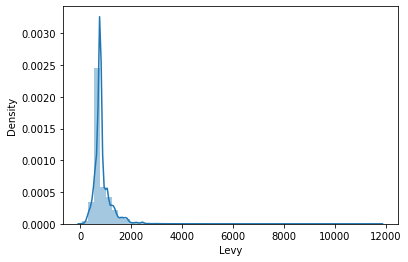

In [ ]:
sns.distplot(train_data['Levy'])          #skewed distribution

In [ ]:
train_data['Levy']=np.log(train_data['Levy'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


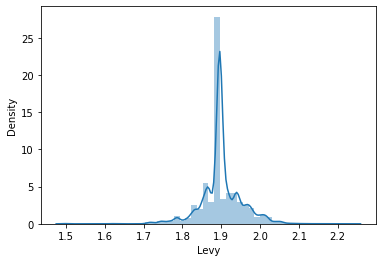

In [ ]:
sns.distplot(np.log(train_data['Levy']))       #transformed into log normal distribution

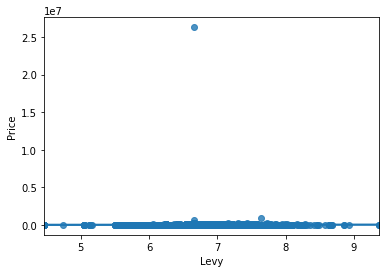

In [ ]:
#scatter graph--------
sns.regplot(x='Levy',y='Price',data=train_data)        #----->important feature

In [ ]:
#2--Prod. year----------->
train_data['Age']=2021-train_data['Prod. year']

In [ ]:
train_data=train_data.drop('Prod. year',axis=1)

In [ ]:
train_data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328,7.243513,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,11
1,16621,6.925595,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,10
2,8467,6.660575,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,15
3,3607,6.759255,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,10
4,11726,6.100319,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,6.660575,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,22
19233,15681,6.722630,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,10
19234,26108,6.728629,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,11
19235,5331,7.160846,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,14


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


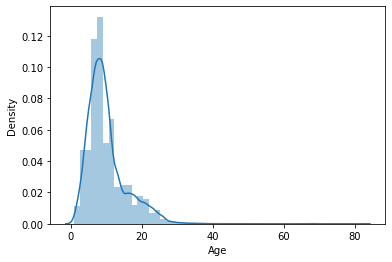

In [ ]:
sns.distplot(train_data['Age'])

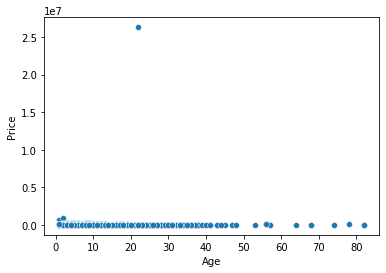

In [ ]:
sns.scatterplot(x='Age',y='Price',data=train_data)   #---------->important feature

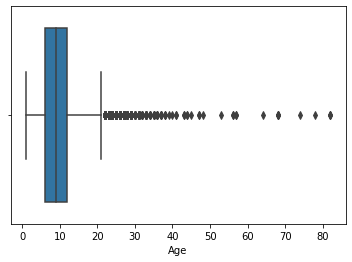

In [ ]:
sns.boxplot(x=train_data['Age'])

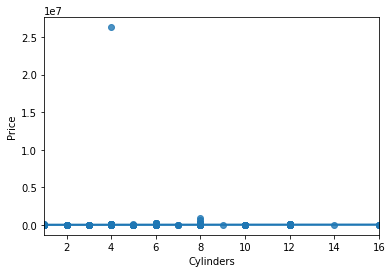

In [ ]:
#cylinders ---------->
sns.regplot(x='Cylinders',y='Price',data=train_data)

In [ ]:
train_data[['Cylinders','Airbags']]=train_data[['Cylinders','Airbags']].astype('object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


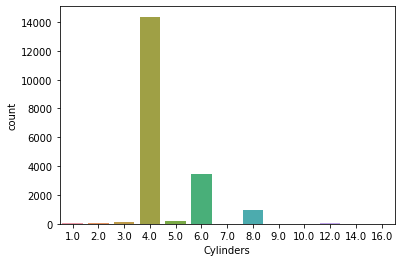

In [ ]:
#cylinders-----
sns.countplot(train_data['Cylinders'])

In [ ]:
train_data['Cylinders']=train_data['Cylinders'].map(train_data['Cylinders'].value_counts().to_dict())

In [ ]:
train_data['Cylinders']=train_data['Cylinders'].astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


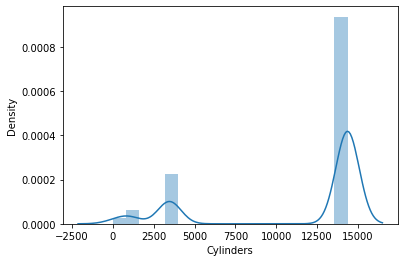

In [ ]:
sns.distplot(train_data['Cylinders'])

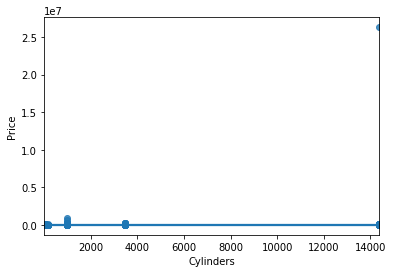

In [ ]:
sns.regplot(x='Cylinders',y='Price',data=train_data)

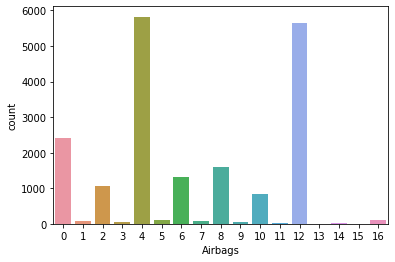

In [ ]:
#Airbags---->
sns.countplot(x="Airbags",data=train_data)

In [ ]:
train_data['Airbags'].unique()

array([12, 8, 2, 0, 4, 6, 10, 3, 1, 16, 5, 7, 9, 11, 14, 15, 13],
      dtype=object)

In [ ]:
train_data['Airbags']=train_data['Airbags'].map(train_data['Airbags'].value_counts().to_dict())

In [ ]:
train_data['Airbags']=train_data['Airbags'].astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


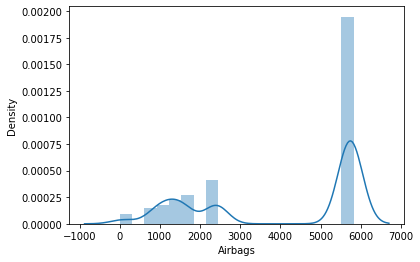

In [ ]:
sns.distplot(train_data['Airbags'])

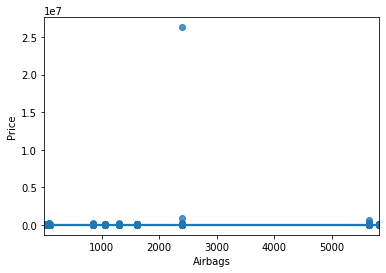

In [ ]:
sns.regplot(x='Airbags',y='Price',data=train_data)

In [ ]:
train_data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')

In [ ]:
#Manufacturer----
train_data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [ ]:
#So many categories in Manufacturer so we will map into their counts-----
count=train_data['Manufacturer'].value_counts().to_dict()
count

{'ACURA': 15,
 'ALFA ROMEO': 4,
 'ASTON MARTIN': 1,
 'AUDI': 255,
 'BENTLEY': 2,
 'BMW': 1049,
 'BUICK': 16,
 'CADILLAC': 14,
 'CHEVROLET': 1069,
 'CHRYSLER': 26,
 'CITROEN': 9,
 'DAEWOO': 91,
 'DAIHATSU': 13,
 'DODGE': 91,
 'FERRARI': 2,
 'FIAT': 78,
 'FORD': 1111,
 'GAZ': 12,
 'GMC': 15,
 'GREATWALL': 1,
 'HAVAL': 1,
 'HONDA': 977,
 'HUMMER': 5,
 'HYUNDAI': 3769,
 'INFINITI': 30,
 'ISUZU': 4,
 'JAGUAR': 42,
 'JEEP': 138,
 'KIA': 421,
 'LAMBORGHINI': 1,
 'LANCIA': 1,
 'LAND ROVER': 49,
 'LEXUS': 982,
 'LINCOLN': 15,
 'MASERATI': 4,
 'MAZDA': 183,
 'MERCEDES-BENZ': 2076,
 'MERCURY': 4,
 'MINI': 48,
 'MITSUBISHI': 289,
 'MOSKVICH': 4,
 'NISSAN': 660,
 'OPEL': 397,
 'PEUGEOT': 17,
 'PONTIAC': 1,
 'PORSCHE': 54,
 'RENAULT': 37,
 'ROLLS-ROYCE': 2,
 'ROVER': 3,
 'SAAB': 2,
 'SATURN': 1,
 'SCION': 7,
 'SEAT': 2,
 'SKODA': 20,
 'SSANGYONG': 441,
 'SUBARU': 275,
 'SUZUKI': 76,
 'TESLA': 1,
 'TOYOTA': 3662,
 'UAZ': 12,
 'VAZ': 48,
 'VOLKSWAGEN': 579,
 'VOLVO': 19,
 'ZAZ': 2,
 'სხვა': 2}

In [ ]:
train_data['Manufacturer']=train_data['Manufacturer'].map(count)

In [ ]:
train_data['Manufacturer']=train_data['Manufacturer'].astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


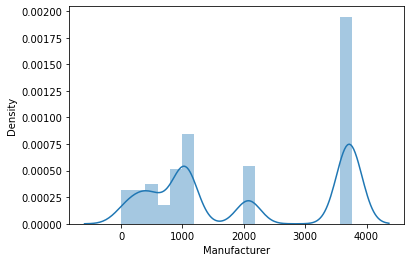

In [ ]:
sns.distplot(train_data['Manufacturer'])

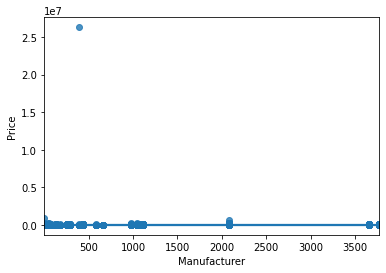

In [ ]:
sns.regplot(x='Manufacturer',y='Price',data=train_data)

In [ ]:
#model--------
count1=train_data['Model'].value_counts().to_dict()

In [ ]:
train_data['Model']=train_data['Model'].map(count1)

In [ ]:
train_data['Model']=train_data['Model'].astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


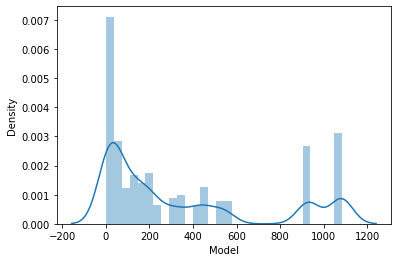

In [ ]:
sns.distplot(train_data['Model'])

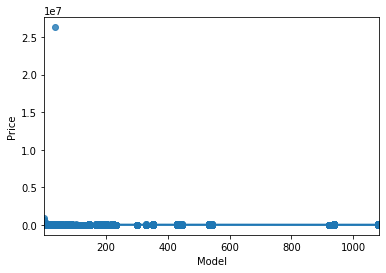

In [ ]:
sns.regplot(x='Model',y='Price',data=train_data)

In [ ]:
#category------
count2=train_data['Category'].value_counts().to_dict()
count2

{'Cabriolet': 36,
 'Coupe': 532,
 'Goods wagon': 233,
 'Hatchback': 2847,
 'Jeep': 5473,
 'Limousine': 11,
 'Microbus': 306,
 'Minivan': 647,
 'Pickup': 52,
 'Sedan': 8736,
 'Universal': 364}

In [ ]:
train_data['Category']=train_data['Category'].map(count2)

In [ ]:
train_data['Category']=train_data['Category'].astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


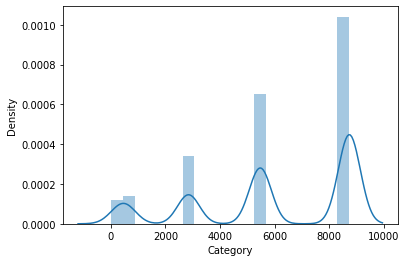

In [ ]:
sns.distplot(train_data['Category'])

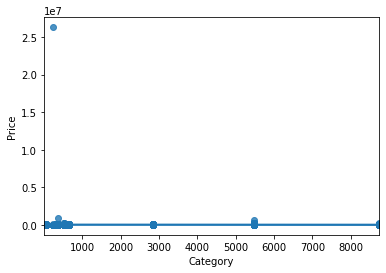

In [ ]:
sns.regplot(x='Category',y='Price',data=train_data)

In [ ]:
#Leather interior------
count3=train_data['Leather interior'].value_counts().to_dict()
count3

{'No': 5283, 'Yes': 13954}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


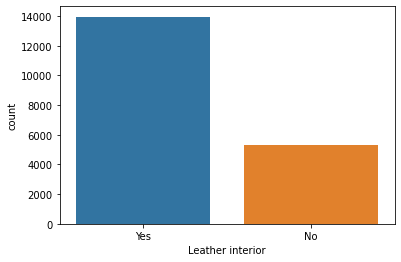

In [ ]:
sns.countplot(train_data['Leather interior'])              #--------there is only 2 types of categories then we cant frequency incoding
                                                          # we will do one hot encoding in this

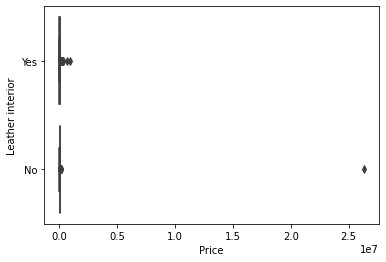

In [ ]:
sns.boxplot(y='Leather interior',x='Price',data=train_data)

In [ ]:
#Fuel type--------
count3=train_data['Fuel type'].value_counts().to_dict        #so there is not more categories so we will again do for this one hot encoding
count3

<bound method Series.to_dict of Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


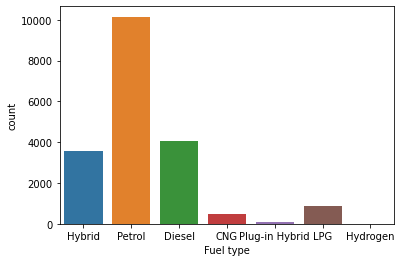

In [ ]:
sns.countplot(train_data['Fuel type'])

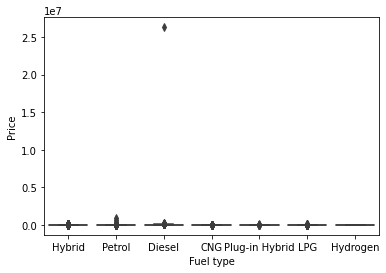

In [ ]:
sns.boxplot(x='Fuel type',y='Price',data=train_data)

In [ ]:
#Engine volume-----
count4=train_data['Engine volume'].value_counts().to_dict()        #frequency incoding
count4

{'0': 10,
 '0.1': 4,
 '0.2': 9,
 '0.2 Turbo': 1,
 '0.3': 2,
 '0.3 Turbo': 1,
 '0.4': 22,
 '0.4 Turbo': 1,
 '0.5': 1,
 '0.6': 5,
 '0.6 Turbo': 3,
 '0.7': 19,
 '0.7 Turbo': 6,
 '0.8': 8,
 '0.8 Turbo': 1,
 '0.9': 2,
 '1': 117,
 '1.0 Turbo': 8,
 '1.1': 8,
 '1.1 Turbo': 1,
 '1.2': 101,
 '1.2 Turbo': 4,
 '1.3': 518,
 '1.3 Turbo': 18,
 '1.4': 374,
 '1.4 Turbo': 157,
 '1.5': 1321,
 '1.5 Turbo': 72,
 '1.6': 1462,
 '1.6 Turbo': 116,
 '1.7': 157,
 '1.7 Turbo': 38,
 '1.8': 1760,
 '1.8 Turbo': 177,
 '1.9': 39,
 '1.9 Turbo': 31,
 '2': 3916,
 '2.0 Turbo': 408,
 '2.1': 7,
 '2.1 Turbo': 3,
 '2.2': 227,
 '2.2 Turbo': 219,
 '2.3': 116,
 '2.3 Turbo': 16,
 '2.4': 987,
 '2.4 Turbo': 50,
 '2.5': 2277,
 '2.5 Turbo': 93,
 '2.6': 18,
 '2.7': 133,
 '2.7 Turbo': 49,
 '2.8': 58,
 '2.8 Turbo': 13,
 '2.9': 9,
 '2.9 Turbo': 12,
 '20': 2,
 '3': 823,
 '3.0 Turbo': 278,
 '3.1': 1,
 '3.2': 148,
 '3.2 Turbo': 24,
 '3.3': 204,
 '3.4': 7,
 '3.5': 1228,
 '3.5 Turbo': 42,
 '3.6': 123,
 '3.6 Turbo': 5,
 '3.7': 79,
 '3.7 Turbo'

In [ ]:
train_data['Engine volume']=train_data['Engine volume'].map(count4)

In [ ]:
train_data['Engine volume']=train_data['Engine volume'].astype('float')


In [ ]:
train_data['Engine volume'].unique()

array([1.228e+03, 8.230e+02, 5.180e+02, 2.277e+03, 3.916e+03, 1.760e+03,
       9.870e+02, 1.080e+02, 1.462e+03, 2.040e+02, 4.080e+02, 2.190e+02,
       9.800e+01, 1.321e+03, 8.100e+01, 2.780e+02, 1.570e+02, 1.230e+02,
       1.160e+02, 7.200e+01, 2.270e+02, 1.600e+01, 3.740e+02, 5.700e+01,
       1.300e+01, 1.480e+02, 3.200e+01, 3.700e+02, 1.010e+02, 6.700e+01,
       9.000e+00, 1.000e+00, 1.770e+02, 5.000e+01, 4.200e+01, 3.900e+01,
       1.330e+02, 3.400e+01, 8.000e+00, 2.200e+01, 5.800e+01, 2.400e+01,
       7.000e+00, 1.900e+01, 5.000e+00, 1.800e+01, 7.900e+01, 1.170e+02,
       9.300e+01, 3.100e+01, 2.500e+01, 5.100e+01, 2.000e+00, 4.000e+00,
       3.800e+01, 3.000e+00, 4.900e+01, 1.200e+01, 1.000e+01, 1.100e+01,
       6.000e+00])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


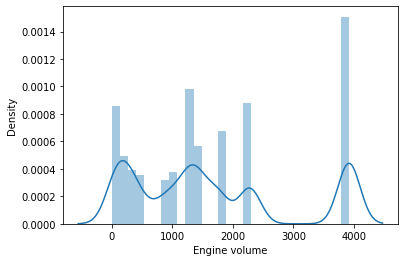

In [ ]:
sns.distplot(train_data['Engine volume'])

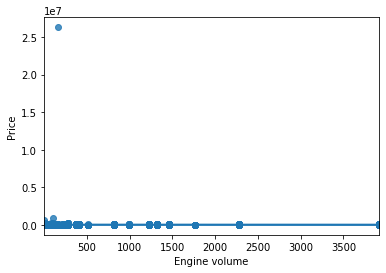

In [ ]:
sns.regplot(x='Engine volume',y='Price',data=train_data)

In [ ]:
#milage---
count5=train_data['Mileage'].value_counts().to_dict()


In [ ]:
train_data['Mileage']=train_data['Mileage'].map(count5)

In [ ]:
train_data['Mileage']=train_data['Mileage'].astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


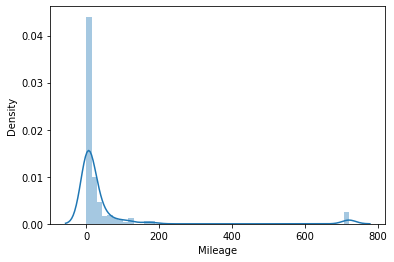

In [ ]:
sns.distplot(train_data['Mileage'])

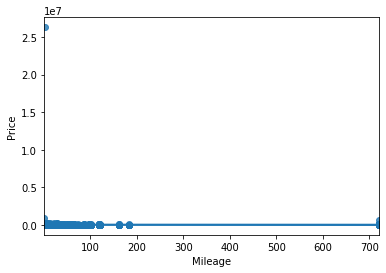

In [ ]:
sns.regplot(x='Mileage',y='Price',data=train_data)

In [ ]:
#Gear box type----------
count6=train_data['Gear box type'].value_counts().to_dict()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


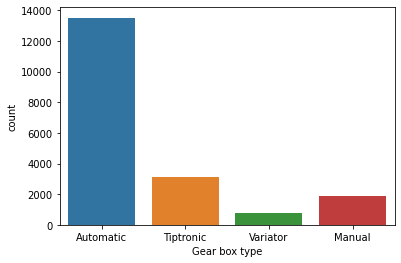

In [ ]:
sns.countplot(train_data['Gear box type'])            #---we will do one hot encoding in it


In [ ]:
count7=train_data['Drive wheels'].value_counts().to_dict()
count7

{'4x4': 4058, 'Front': 12874, 'Rear': 2305}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


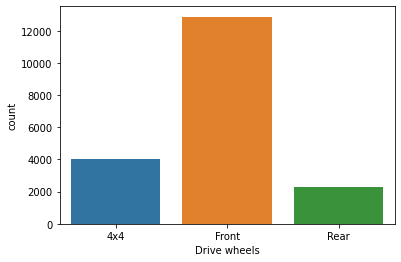

In [ ]:
sns.countplot(train_data['Drive wheels'])    #--one hot encoding

In [ ]:
#Doors---
count7=train_data['Doors'].value_counts().to_dict()
count7

{'02-Mar': 777, '04-May': 18332, '>5': 128}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


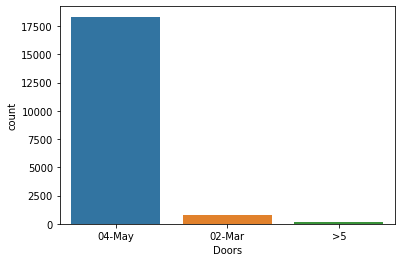

In [ ]:
sns.countplot(train_data['Doors'])       

In [ ]:
#wheel--------
count8=train_data['Wheel'].value_counts().to_dict()            #one hot encoding
count8

{'Left wheel': 17753, 'Right-hand drive': 1484}

In [ ]:
#Color----
count9=train_data['Color'].value_counts().to_dict()
count9

{'Beige': 134,
 'Black': 5033,
 'Blue': 1396,
 'Brown': 187,
 'Carnelian red': 179,
 'Golden': 145,
 'Green': 322,
 'Grey': 2375,
 'Orange': 253,
 'Pink': 26,
 'Purple': 39,
 'Red': 639,
 'Silver': 3792,
 'Sky blue': 122,
 'White': 4489,
 'Yellow': 106}

In [ ]:
train_data['Color']=train_data['Color'].map(count9)

In [ ]:
train_data['Color']=train_data['Color'].astype('float')

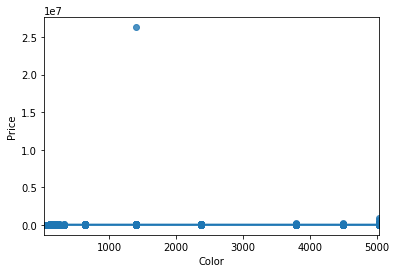

In [ ]:
sns.regplot(x=train_data['Color'],y=train_data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


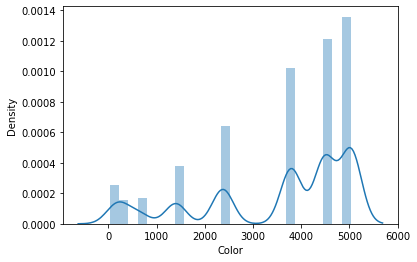

In [ ]:
sns.distplot(train_data['Color'])

In [ ]:
train_data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328,7.243513,982.0,173.0,5473.0,Yes,Hybrid,1228.0,19.0,3462.0,Automatic,4x4,04-May,Left wheel,3792.0,5654.0,11
1,16621,6.925595,1069.0,23.0,5473.0,No,Petrol,823.0,26.0,3462.0,Tiptronic,4x4,04-May,Left wheel,5033.0,1608.0,10
2,8467,6.660575,977.0,446.0,2847.0,No,Petrol,518.0,183.0,14367.0,Variator,Front,04-May,Right-hand drive,5033.0,1066.0,15
3,3607,6.759255,1111.0,149.0,5473.0,Yes,Hybrid,2277.0,7.0,14367.0,Automatic,4x4,04-May,Left wheel,4489.0,2405.0,10
4,11726,6.100319,977.0,446.0,2847.0,Yes,Petrol,518.0,1.0,14367.0,Automatic,Front,04-May,Left wheel,3792.0,5823.0,7


In [ ]:
train_data=pd.get_dummies(train_data,columns=['Leather interior','Fuel type','Gear box type','Drive wheels','Doors','Wheel'],drop_first=True)

In [ ]:
train_data

,Price,Levy,Manufacturer,Model,Category,Engine volume,Mileage,Cylinders,Color,Airbags,Age,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_04-May,Doors_>5,Wheel_Right-hand drive
0,13328,7.243513,982.0,173.0,5473.0,1228.0,19.0,3462.0,3792.0,5654.0,11,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,16621,6.925595,1069.0,23.0,5473.0,823.0,26.0,3462.0,5033.0,1608.0,10,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,8467,6.660575,977.0,446.0,2847.0,518.0,183.0,14367.0,5033.0,1066.0,15,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1
3,3607,6.759255,1111.0,149.0,5473.0,2277.0,7.0,14367.0,4489.0,2405.0,10,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,11726,6.100319,977.0,446.0,2847.0,518.0,1.0,14367.0,3792.0,5823.0,7,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,6.660575,2076.0,8.0,532.0,408.0,67.0,14367.0,3792.0,104.0,22,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
19233,15681,6.722630,3769.0,1079.0,8736.0,987.0,5.0,14367.0,639.0,1608.0,10,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0
19234,26108,6.728629,3769.0,429.0,5473.0,3916.0,3.0,14367.0,2375.0,5823.0,11,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0
19235,5331,7.160846,1069.0,140.0,5473.0,3916.0,2.0,14367.0,5033.0,5823.0,14,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
train_data.corr()

,Price,Levy,Manufacturer,Model,Category,Engine volume,Mileage,Cylinders,Color,Airbags,Age,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_04-May,Doors_>5,Wheel_Right-hand drive
Price,1.000000,0.007860,-0.001876,-0.011952,-0.021253,-0.009948,-0.010582,-0.002057,-0.003281,0.000388,-0.012982,0.000754,0.032648,-0.019330,0.000069,-0.006070,-0.006536,0.001809,0.012172,0.018158,-0.003998,-0.000482,-0.002640,-0.032472,0.001608,-0.014649
Levy,0.007860,1.000000,-0.065781,-0.159498,-0.024808,-0.148747,0.003822,-0.416526,0.056738,0.030817,0.040244,0.051020,0.109622,-0.247012,-0.000832,-0.025039,0.123708,-0.060854,0.011334,-0.019002,-0.036508,-0.351823,0.117494,-0.024615,-0.001420,0.069768
Manufacturer,-0.001876,-0.065781,1.000000,0.682916,0.096788,0.228944,-0.088628,0.209439,-0.002470,0.211858,-0.268275,0.115653,0.035415,0.230312,0.008816,0.162539,-0.239584,-0.024945,-0.235197,-0.096352,0.055047,0.270816,-0.101856,0.119737,-0.010654,-0.107134
Model,-0.011952,-0.159498,0.682916,1.000000,0.249091,0.250163,-0.071060,0.256977,-0.004574,0.185868,-0.258983,0.107860,-0.068633,0.305875,-0.006419,0.248337,-0.246105,-0.019891,-0.232445,-0.129481,0.089354,0.375080,-0.217214,0.145937,-0.033851,-0.139644
Category,-0.021253,-0.024808,0.096788,0.249091,1.000000,0.147078,-0.042152,-0.039004,0.055630,0.119830,-0.181152,0.227085,-0.220339,-0.016067,0.006797,0.120615,0.151904,-0.016554,-0.238969,0.107778,-0.091191,0.023375,-0.002523,0.290428,-0.052934,-0.206154
Engine volume,-0.009948,-0.148747,0.228944,0.250163,0.147078,1.000000,-0.092460,0.404069,-0.010564,0.231849,-0.198790,0.129085,0.072458,-0.010923,-0.003641,0.210871,-0.134098,-0.002971,-0.134189,-0.178211,-0.032207,0.305449,-0.167542,0.130579,-0.036553,-0.090938
Mileage,-0.010582,0.003822,-0.088628,-0.071060,-0.042152,-0.092460,1.000000,-0.048451,-0.024099,-0.105459,0.198907,-0.147786,-0.049754,0.010360,-0.001878,-0.040175,0.020921,0.002251,0.147478,0.001930,0.017506,-0.060681,0.070837,-0.054433,0.021486,0.095185
Cylinders,-0.002057,-0.416526,0.209439,0.256977,-0.039004,0.404069,-0.048451,1.000000,-0.099605,0.089337,-0.140965,-0.157032,-0.011109,0.129860,-0.011178,0.054275,-0.103336,0.036538,0.053424,-0.192440,0.078269,0.609279,-0.270961,0.078962,-0.028528,0.049179
Color,-0.003281,0.056738,-0.002470,-0.004574,0.055630,-0.010564,-0.024099,-0.099605,1.000000,0.070502,-0.116736,0.132532,0.069194,-0.004521,-0.005365,-0.078030,-0.007646,-0.005913,-0.089230,0.012395,-0.041088,-0.080154,0.022681,0.049338,0.000641,-0.040592
Airbags,0.000388,0.030817,0.211858,0.185868,0.119830,0.231849,-0.105459,0.089337,0.070502,1.000000,-0.310483,0.403166,0.169646,-0.062494,-0.008357,0.091084,-0.094909,-0.041893,-0.239725,-0.208271,-0.127323,0.157867,-0.120024,0.133284,-0.053146,-0.164376


Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
model.fit(train_data)
train=model.transform(train_data)

In [ ]:
train_data3=pd.DataFrame(train,columns=train_data.columns)

In [ ]:
train_data3

,Price,Levy,Manufacturer,Model,Category,Engine volume,Mileage,Cylinders,Color,Airbags,Age,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_04-May,Doors_>5,Wheel_Right-hand drive
0,-0.027432,1.549007,-0.730661,-0.440517,-0.180317,-0.323089,-0.194799,-1.550265,0.158456,0.763384,0.161034,0.615306,-0.515276,2.092001,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,-1.422413,-0.368962,0.222187,-0.081844,-0.289122
1,-0.010153,0.641319,-0.669683,-0.837415,-0.180317,-0.628841,-0.143725,-1.550265,0.948938,-1.159111,-0.015379,-1.625208,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,2.280676,-0.200858,-1.422413,-0.368962,0.222187,-0.081844,-0.289122
2,-0.052939,-0.115341,-0.734166,0.281837,-1.084082,-0.859098,1.001792,0.577755,0.948938,-1.416647,0.866685,-1.625208,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,-0.438466,4.978641,0.703031,-0.368962,0.222187,-0.081844,3.458748
3,-0.078441,0.166401,-0.640245,-0.504020,-0.180317,0.468847,-0.282354,0.577755,0.602425,-0.780409,-0.015379,0.615306,-0.515276,2.092001,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,-1.422413,-0.368962,0.222187,-0.081844,-0.289122
4,-0.035838,-1.714930,-0.734166,0.281837,-1.084082,-0.859098,-0.326132,0.577755,0.158456,0.843685,-0.544617,0.615306,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,-0.438466,-0.200858,0.703031,-0.368962,0.222187,-0.081844,-0.289122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-0.052939,-0.115341,0.036123,-0.877104,-1.880813,-0.942142,0.155423,0.577755,0.158456,-1.873750,2.101574,0.615306,-0.515276,-0.478011,-0.00721,-0.220508,-1.056873,-0.067012,3.042981,-0.438466,-0.200858,-1.422413,2.710308,-4.500706,-0.081844,-0.289122
19233,-0.015085,0.061832,1.222747,1.956747,0.942678,-0.505030,-0.296947,0.577755,-1.849918,-1.159111,-0.015379,0.615306,-0.515276,-0.478011,-0.00721,-0.220508,0.946188,-0.067012,-0.328625,2.280676,-0.200858,0.703031,-0.368962,0.222187,-0.081844,-0.289122
19234,0.039628,0.078959,1.222747,0.236856,-0.180317,1.706198,-0.311539,0.577755,-0.744134,0.843685,0.161034,0.615306,1.940709,-0.478011,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,0.703031,-0.368962,0.222187,-0.081844,-0.289122
19235,-0.069394,1.312984,-0.669683,-0.527834,-0.180317,1.706198,-0.318836,0.577755,0.948938,0.843685,0.690272,0.615306,1.940709,-0.478011,-0.00721,-0.220508,-1.056873,-0.067012,-0.328625,-0.438466,-0.200858,0.703031,-0.368962,0.222187,-0.081844,-0.289122


Devide features and target variable

In [ ]:
features=train_data3.iloc[:,1:]
target=train_data3['Price']

Split test and train data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=0)

In [ ]:
x_train.shape

(13465, 25)

In [ ]:
y_train.shape

(13465,)

Model selection

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted=lr.predict(x_test)
predicted

array([-0.03689501,  0.03536717, -0.083027  , ...,  0.06159387,
       -0.03287395,  0.06148048])

In [ ]:
lr.score(x_test,y_test)

-0.11486140879614148

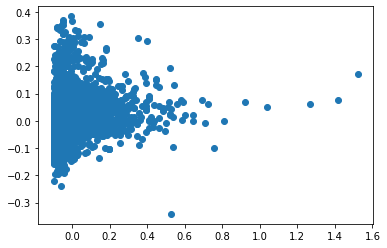

In [ ]:
plt.scatter(y_test,predicted) # visualisation of diffrence between true value and predicted value

In [ ]:
#check for error
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,predicted)
error

0.011327152532759817